In [23]:
from cv2 import imread, IMREAD_GRAYSCALE
from numpy import hsplit, vsplit, array
from numpy import arange, repeat, newaxis
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns

In [11]:
def split_images(img_name, img_size):
 
    img = imread(img_name, IMREAD_GRAYSCALE)
 
    num_rows = img.shape[0] / img_size
    num_cols = img.shape[1] / img_size
 
    sub_imgs = [hsplit(row, num_cols) for row in vsplit(img, num_rows)]
 
    return img, array(sub_imgs)

5000


In [ ]:
def split_data(img_size, sub_imgs, ratio):
 
    partition = int(sub_imgs.shape[1] * ratio)
 
    train = sub_imgs[:, :partition, :, :]
    # test = sub_imgs[:, partition:sub_imgs.shape[1], :, :]
 
    train_imgs = train.reshape(-1, img_size ** 2)
    # test_imgs = test.reshape(-1, img_size ** 2)
 
    labels = arange(10)
    train_labels = repeat(labels, train_imgs.shape[0] / labels.shape[0])[:, newaxis]
    # test_labels = repeat(labels, test_imgs.shape[0] / labels.shape[0])[:, newaxis]
 
    return train_imgs, train_labels

img, sub_imgs = split_images('digits.png', 20)
 
X, y = split_data(20, sub_imgs, 1.0)

print(len(X))

## Train test split

In [14]:
# Assuming 'X' contains the text data and 'y' contains the labels (positive/negative)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training a multinomial Logistic Regression 

In [26]:
# Initialize the Logistic Regression model for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
# Fit the model on the training data
model.fit(X_train, y_train)

c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', solver='sag')

In [27]:
# Predict the responses for the test dataset
y_pred = model.predict(X_test)

In [28]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


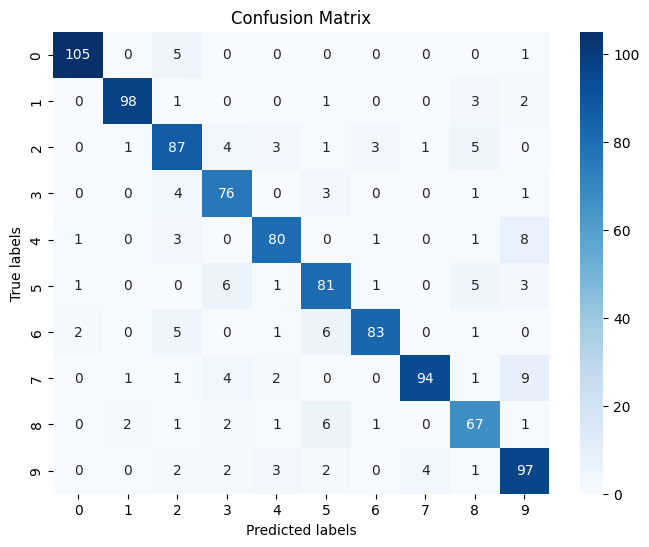

In [29]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## The task is done